In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
train=pd.read_csv('/content/train.csv')
print(train)
n_train= train.shape[0]


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test=pd.read_csv('/content/titanic_test.csv')
print(test)
n_test = test.shape[0]

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# First checks
print('Features non-null values and data type:')
train.info()
print('Check for duplicate values:',
      train['PassengerId'].unique().shape[0]!=n_train)

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Check for duplicate values: False


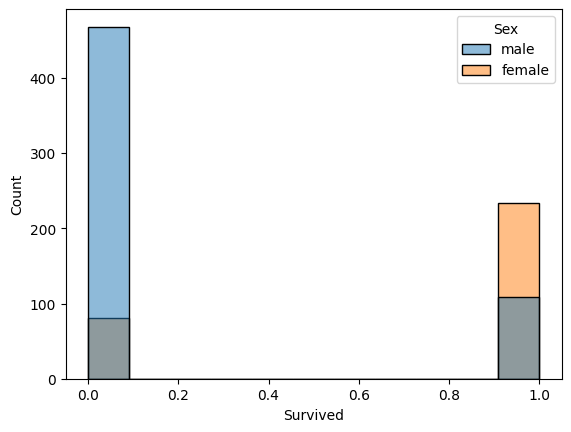

In [ ]:
# Histogram
sns.histplot(data=train, x='Survived', hue='Sex')
plt.show()

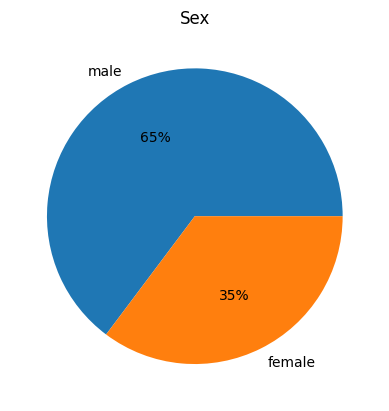

In [ ]:
# Pie chart of Type percentage
value = train['Sex'].value_counts()
Type_percentage = 100*value/train.Sex.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Sex')
plt.show()

In [ ]:
# Create lists of features and target names
features = [col for col in train.columns
            if train[col].dtype=='float64' or col =='Sex']
print('features:', features)
target = ['Survived']
print('target:', target)
# Portion of data where RNF=1
idx_RNF = train.loc[train['Survived']==1].index
train.loc[idx_RNF,target]

features: ['Sex', 'Age', 'Fare']
target: ['Survived']


,Survived
1,1
2,1
3,1
8,1
9,1
...,...
875,1
879,1
880,1
887,1


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


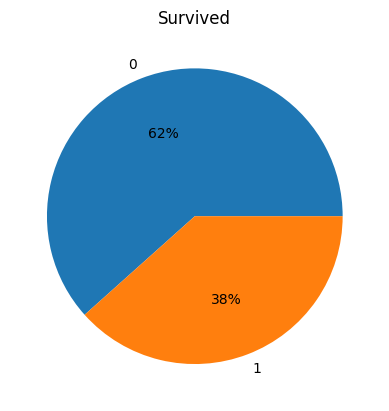

In [ ]:
# Pie chart of Type percentage
value = train['Survived'].value_counts()
Type_percentage = 100*value/train.Survived.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Survived')
plt.show()

In [ ]:
train_dropna_age = train['Age'].dropna()
train["Embarked"].unique()
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch']
train = train.drop(drop_elements, axis = 1)
train['Sex'] = train['Sex'].replace({'male': 1, 'female': 0})
train['Embarked'] = train['Embarked'].replace({'S': 0, 'C': 1,'Q':2})
train=train.dropna()

In [ ]:
X=features
Y=target

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn import svm
from sklearn import metrics

#svm
model= svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train,Y_train)
svm_clf_pred = svm_clf.predict(X_test)
# make predictions
svm_clf_pred = svm_clf.predict(X_test)
Accuracy = metrics.accuracy_score(Y_test, svm_clf_pred)
# print other performance metrics
Precision = metrics.precision_score(Y_test, svm_clf_pred, average='weighted')
Sensitivity_recall = metrics.recall_score(Y_test, svm_clf_pred, average='weighted')
F1_score = metrics.f1_score(Y_test, svm_clf_pred, average='weighted')
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Accuracy': 0.6388888888888888, 'Precision': 0.6445469125902165, 'Sensitivity_recall': 0.6388888888888888, 'F1_score': 0.6412337662337662}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=0)
# train the model
dt.fit(X_train, Y_train)
# make predictions
dt_pred = dt.predict(X_test)
Accuracy = metrics.accuracy_score(Y_test, dt_pred)
# print other performance metrics
Precision = metrics.precision_score(Y_test, dt_pred, average='weighted')
Sensitivity_recall = metrics.recall_score(Y_test, dt_pred, average='weighted')
F1_score = metrics.f1_score(Y_test, dt_pred, average='weighted')
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Accuracy': 0.6944444444444444, 'Precision': 0.6944444444444444, 'Sensitivity_recall': 0.6944444444444444, 'F1_score': 0.6944444444444444}


In [ ]:
#gnb
gnb = GaussianNB()
# train the model
gnb.fit(X_train, Y_train)
# make predictions
gnb_pred = gnb.predict(X_test)
Accuracy = metrics.accuracy_score(Y_test, gnb_pred)
# print other performance metrics
Precision = metrics.precision_score(Y_test, gnb_pred, average='weighted')
Sensitivity_recall = metrics.recall_score(Y_test, gnb_pred, average='weighted')
F1_score = metrics.f1_score(Y_test, gnb_pred, average='weighted')
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Accuracy': 0.6388888888888888, 'Precision': 0.6508654602675059, 'Sensitivity_recall': 0.6388888888888888, 'F1_score': 0.6429430633520448}


In [ ]:
# Make predictions on the test set
prediction1 = gnb.predict(X_test)

# Print the predictions
print(prediction1)
prediction1.shape

[0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0]


(72,)

In [ ]:
print(train['Survived'])


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64
